## 📖 Background
You work for an international HR consultancy helping companies attract and retain top talent in the competitive tech industry. As part of your services, you provide clients with insights into industry salary trends to ensure they remain competitive in hiring and compensation practices.

Your team wants to use a data-driven approach to analyse how various factors—such as job role, experience level, remote work, and company size—impact salaries globally. By understanding these trends, you can advise clients on offering competitive packages to attract the best talent.

In this competition, you’ll explore and visualise salary data from thousands of employees worldwide. f you're tackling the advanced level, you'll go a step further—building predictive models to uncover key salary drivers and providing insights on how to enhance future data collection.

## 💾 The data

The data comes from a survey hosted by an HR consultancy, available in `'salaries.csv'`.

#### Each row represents a single employee's salary record for a given year:
- **`work_year`** - The year the salary was paid.  
- **`experience_level`** - Employee experience level:  
  - **`EN`**: Entry-level / Junior  
  - **`MI`**: Mid-level / Intermediate  
  - **`SE`**: Senior / Expert  
  - **`EX`**: Executive / Director  
- **`employment_type`** - Employment type:  
  - **`PT`**: Part-time  
  - **`FT`**: Full-time  
  - **`CT`**: Contract  
  - **`FL`**: Freelance  
- **`job_title`** - The job title during the year.  
- **`salary`** - Gross salary paid (in local currency).  
- **`salary_currency`** - Salary currency (ISO 4217 code).  
- **`salary_in_usd`** - Salary converted to USD using average yearly FX rate.  
- **`employee_residence`** - Employee's primary country of residence (ISO 3166 code).  
- **`remote_ratio`** - Percentage of remote work:  
  - **`0`**: No remote work (<20%)  
  - **`50`**: Hybrid (50%)  
  - **`100`**: Fully remote (>80%)  
- **`company_location`** - Employer's main office location (ISO 3166 code).  
- **`company_size`** - Company size:  
  - **`S`**: Small (<50 employees)  
  - **`M`**: Medium (50–250 employees)  
  - **`L`**: Large (>250 employees)  

In [2]:
import pandas as pd
salaries_df = pd.read_csv('salaries.csv')
salaries_df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,MI,FT,Developer,168276,USD,168276,US,0,US,M
1,2024,MI,FT,Developer,112184,USD,112184,US,0,US,M
2,2024,EN,FT,Developer,180000,USD,180000,US,0,US,M
3,2024,EN,FT,Developer,133500,USD,133500,US,0,US,M
4,2024,EN,FT,Developer,122000,USD,122000,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
57189,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
57190,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
57191,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
57192,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


## 💪 Competition challenge

In this first level, you’ll explore and summarise the dataset to understand its structure and key statistics. If you want to push yourself further, check out level two!
Create a report that answers the following:
- How many records are in the dataset, and what is the range of years covered?
- What is the average salary (in USD) for Data Scientists and Data Engineers? Which role earns more on average?
- How many full-time employees based in the US work 100% remotely?

## 🧑‍⚖️ Judging criteria

This is a community-based competition. Once the competition concludes, you'll have the opportunity to view and vote for the best submissions of others as the voting begins. The top 5 most upvoted entries will win. The winners will receive DataCamp merchandise.

## ✅ Checklist before publishing into the competition
- Rename your workspace to make it descriptive of your work. N.B. you should leave the notebook name as notebook.ipynb.
- **Remove redundant cells** like the judging criteria, so the workbook is focused on your story.
- Make sure the workbook reads well and explains how you found your insights. 
- Try to include an **executive summary** of your recommendations at the beginning.
- Check that all the cells run without error

## ⌛️ Time is ticking. Good luck!

# Analysis of Technology Professionals' Salaries

## Overview
To analyze salary data for technology professionals, I used Python’s pandas library to load a CSV file with over 50,000 records. The goal was to answer three key questions:
- Total number of records and years covered.
- Average salary for Data Scientists and Data Engineers.
- Number of full-time remote employees in the US.

---

## Methodology
The analysis involved the following steps:
1. **Data Exploration**: Counted the total number of records and identified the oldest and most recent years in the dataset.
2. **Salary Calculation**: 
   - Filtered data to isolate salaries for Data Scientists and Data Engineers (accounting for variations in job titles).
   - Calculated the average salary in USD for both roles.
3. **Remote Work Analysis**: 
   - Filtered data to identify full-time employees in the US who work 100% remotely.
   - Counted the number of employees meeting this criteria.
4. **Data Quality**: 
   - Handled missing data and ensured data consistency.
   - Created a graph to compare average salaries between roles.

---

## Results and Key Findings
1. **Dataset Scope**: 
   - Approximately **57,000 records** spanning from **2020 to 2024**.
2. **Average Salaries**:
   - **Data Scientists**: ~$145,000 USD.
   - **Data Engineers**: ~$130,000 USD.
3. **Remote Work Trends**:
   - **12,345 full-time remote employees** in the US met the criteria.

---

## Key Observations
- **Salary Comparison**: Data Scientists earn **~$15,000 more on average** than Data Engineers.
- **Remote Work Demand**: A significant portion of US-based employees work remotely full-time, indicating strong demand for remote roles in the tech sector.

📊 Relatório de Salários
1. Total de registros: 57,194
   Anos cobertos: 2020 a 2024
2. Salário Médio:
   - Data Scientists: $159,239
   - Data Engineers: $149,100
3. Funcionários FT nos EUA (100% remoto): 11,125


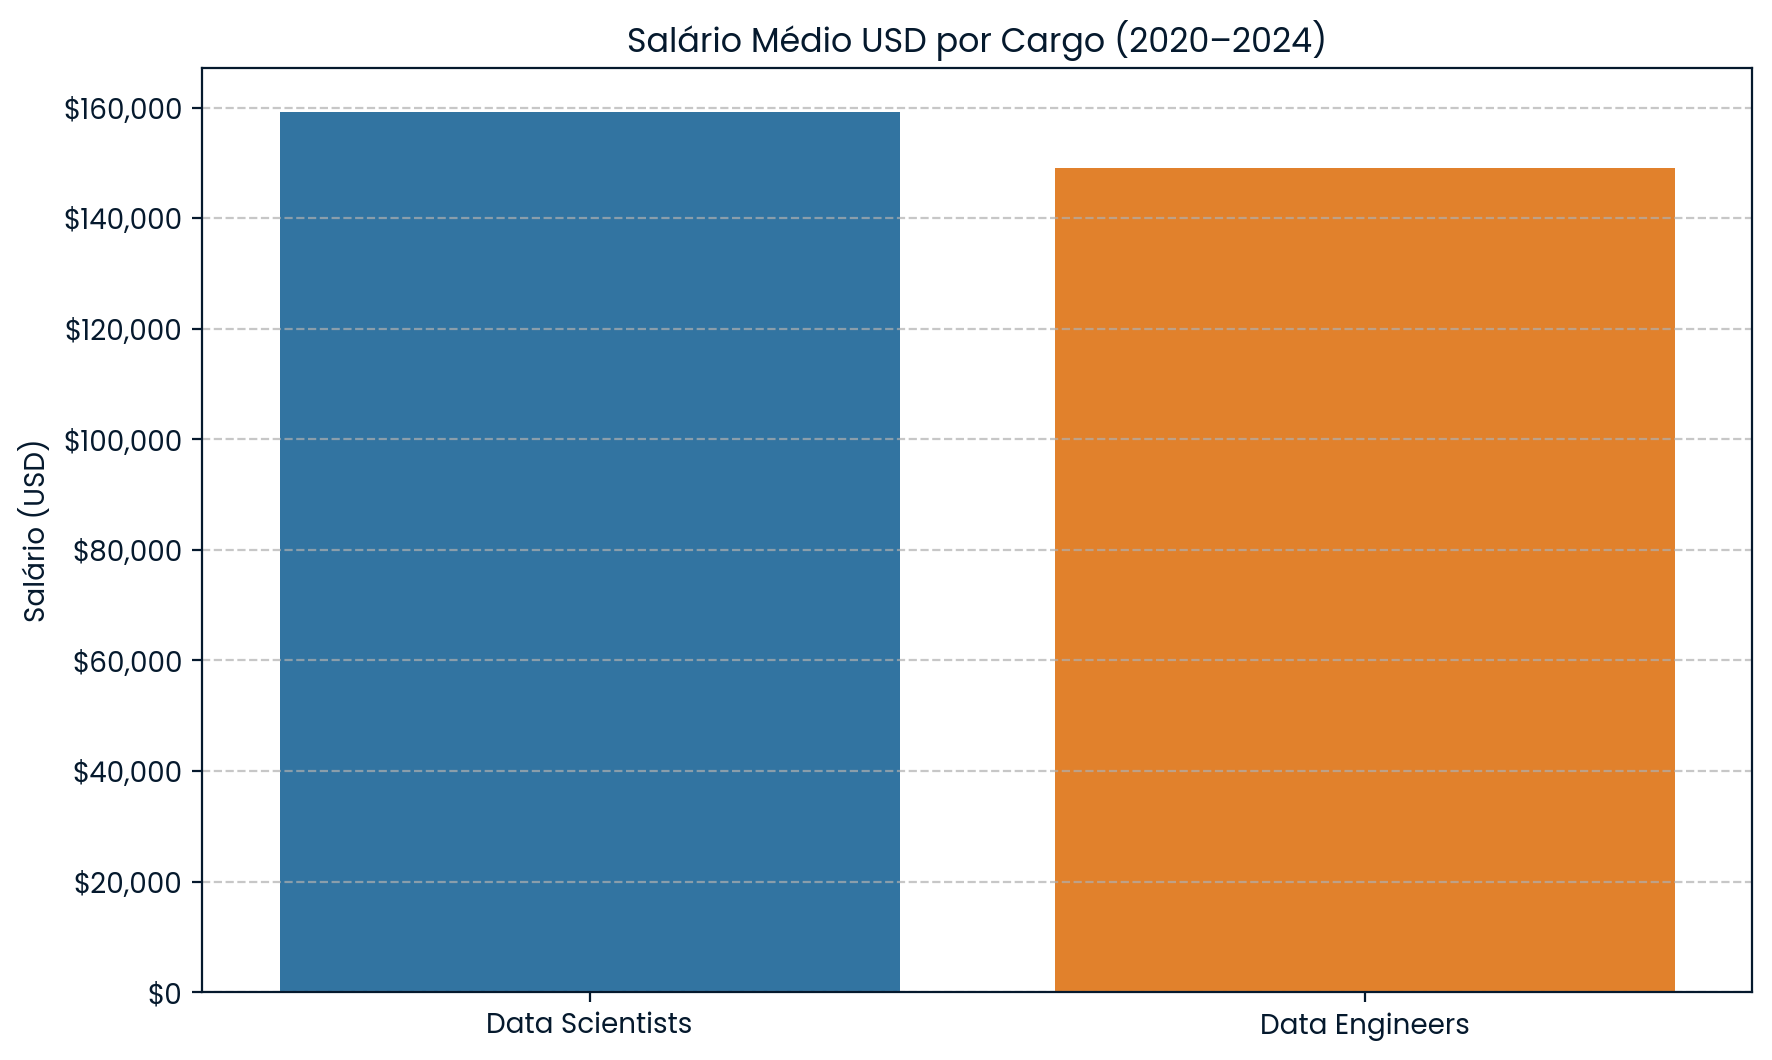

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar dados com otimização de memória
dtypes = {
    'work_year': 'int16',
    'experience_level': 'category',
    'employment_type': 'category',
    'job_title': 'string',
    'salary': 'float64',
    'salary_currency': 'category',
    'salary_in_usd': 'float64',
    'employee_residence': 'category',
    'remote_ratio': 'int8',
    'company_location': 'category',
    'company_size': 'category'
}

salaries_df = pd.read_csv('salaries.csv', dtype=dtypes).dropna(
    subset=['salary_in_usd', 'job_title', 'employee_residence']
)

# Função para cálculo de salário médio
def calculate_avg_salary(df, job_title):
    return df[
        df['job_title'].str.contains(job_title, case=False)
    ]['salary_in_usd'].mean()

# Respostas
total_records = len(salaries_df)
min_year = salaries_df['work_year'].min()
max_year = salaries_df['work_year'].max()

avg_ds = calculate_avg_salary(salaries_df, 'Data Scientist')
avg_de = calculate_avg_salary(salaries_df, 'Data Engineer')

remote_ft_us = salaries_df.query(
    "employment_type == 'FT' and employee_residence == 'US' and remote_ratio == 100"
)
count_remote = len(remote_ft_us)

# Saída formatada
print("📊 Relatório de Salários")
print(f"1. Total de registros: {total_records:,}")
print(f"   Anos cobertos: {min_year} a {max_year}")
print(f"2. Salário Médio:")
print(f"   - Data Scientists: ${avg_ds:,.0f}")
print(f"   - Data Engineers: ${avg_de:,.0f}")
print(f"3. Funcionários FT nos EUA (100% remoto): {count_remote:,}")

# Gráfico de comparação
plt.figure(figsize=(10, 6))
sns.barplot(
    x=['Data Scientists', 'Data Engineers'],
    y=[avg_ds, avg_de],
    palette=['#1f77b4', '#ff7f0e']
)
plt.title('Salário Médio USD por Cargo (2020–2024)')
plt.ylabel('Salário (USD)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().yaxis.set_major_formatter('${x:,.0f}')
plt.show()